# Model result

## Check if balance just for hourly precipitation rate

In [20]:
import netCDF4 as nc
import glob
import numpy as np
urban_swfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\urban_wrfoutfile/wrfout_d01*"))*24)])
urban_pre = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\urban_wrfoutfile/wrfout_d01*"))*24)])
num = 0
for file in glob.glob(fr"F:\day_cycle\data\wrfout_100levels\control_case/wrfout_d01_2020*"):
    dataset = nc.Dataset(file, 'a')
    print(file)
    for i in range(0,24):
        # urban_swfx[num*24+i] = np.mean(np.array(dataset["SWDOWN"][i,:,:]))
        urban_pre[num*24+i] = np.mean(np.array(dataset["RAINNC"][i,:,:]))
    num+=1
    dataset.close()
control_sw = urban_swfx
control_pre= urban_pre

urban_swfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\urban_wrfoutfile/wrfout_d01*"))*24)])
urban_pre = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\urban_wrfoutfile/wrfout_d01*"))*24)])
num = 0
for file in glob.glob(fr"F:\day_cycle\data\urban_wrfoutfile/wrfout_d01*"):
    dataset = nc.Dataset(file, 'a')
    print(file)
    for i in range(0,24):
        # urban_swfx[num*24+i] = np.mean(np.array(dataset["SWDOWN"][i,:,:]))
        urban_pre[num*24+i] = np.mean(np.array(dataset["RAINNC"][i,:,:]))
    num+=1
    dataset.close()
urban_sw = urban_swfx
urban_pre= urban_pre

urban_pre[1:] = urban_pre[1:] - urban_pre[:-1]
control_pre[1:] = control_pre[1:] - control_pre[:-1]

F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-01_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-02_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-03_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-04_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-05_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-06_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-07_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-08_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-09_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-10_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-11_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-12_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfo

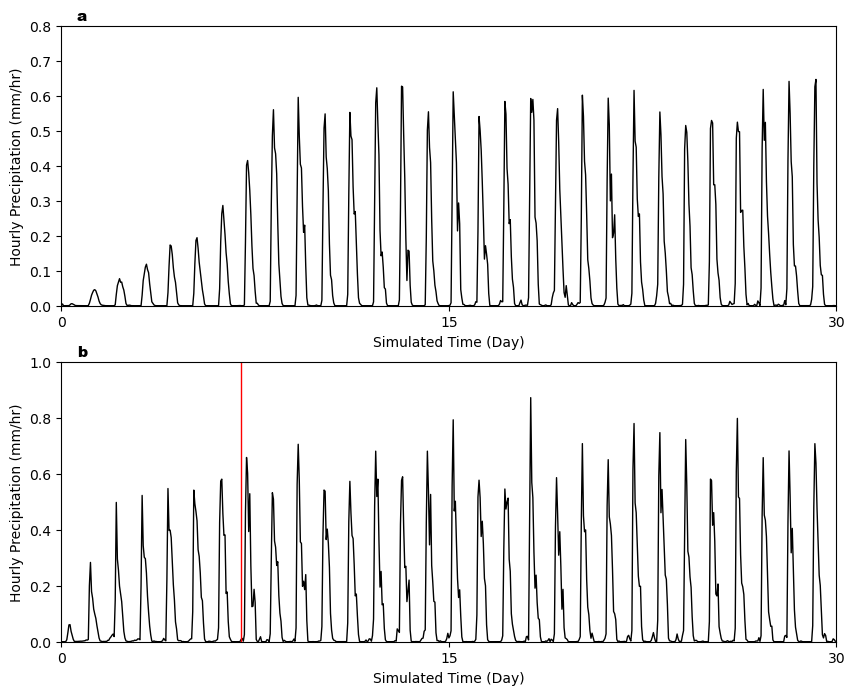

In [27]:
def data_sw(ax,data1,data2):
    ax.plot(data2,c = "k",lw = 1)
    return ax
def data_pre(ax,data1,data2):
    ax.plot(data2,c = "k",lw = 1)
    return ax
fig , ax = plt.subplots(2,1,figsize = (10,8))
ax[0] = data_sw(ax[0],urban_pre,urban_pre)
ax[0].set_ylabel("Hourly Precipitation (mm/hr)")
ax[0].set_xticks([0,360,720],[0,15,30])
ax[0].set_xlabel("Simulated Time (Day)")
ax[0].set_ylim(0,0.8)
ax[0].set_xlim(0,720)

ax[1] = data_pre(ax[1],control_pre,control_pre)
ax[1].set_ylabel("Hourly Precipitation (mm/hr)")
ax[1].set_xticks([0,360,720],[0,15,30])
ax[1].set_xlabel("Simulated Time (Day)")
ax[1].set_ylim(0,1)
ax[1].set_xlim(0,720)
ax[1].axvline(
    x=7*24-1,              # 竖线位置
    color="red",         # 线条颜色，可以改成 black, gray 等
    linestyle="-",      # 虚线 '--'，实线是 '-'
    linewidth=1          # 线宽
)
dict_title_cfg = dict(fontsize=11, fontweight="heavy", ha="left", fontfamily="Arial")

ax[0].text(0.02, 1.02, "a", **dict_title_cfg, transform=ax[0].transAxes)
ax[1].text(0.02, 1.02,"b", **dict_title_cfg, transform=ax[1].transAxes)

fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/spinup_rain.pdf", dpi=300, bbox_inches="tight")
fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/spinup_rain.eps", dpi=400, bbox_inches="tight")
fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/spinup_rain.png", dpi=400, bbox_inches="tight")


## Simulated Rain for the urban area

### read data

In [5]:
import netCDF4 as nc
import glob
import numpy as np
# urban_swfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
urban_pre = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
num = 0
for file in glob.glob(fr"F:\day_cycle\data\wrfout_100levels\control_case/wrfout_d01_2020*"):
    dataset = nc.Dataset(file, 'a')
    print(file)
    for i in range(0,24):
        # urban_swfx[num*24+i] = np.mean(np.array(dataset["SWDOWN"][i,130:170,130:170]))
        urban_pre[num*24+i] = np.mean(np.array(dataset["RAINNC"][i,130:170,130:170]))
    num+=1
    dataset.close()
# control_sw = urban_swfx
control_pre= urban_pre

# urban_swfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
urban_pre = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
num = 0
for file in glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"):
    dataset = nc.Dataset(file, 'a')
    print(file)
    for i in range(0,24):
        # urban_swfx[num*24+i] = np.mean(np.array(dataset["SWDOWN"][i,:,:]))
        urban_pre[num*24+i] = np.mean(np.array(dataset["RAINNC"][i,130:170,130:170]))
    num+=1
    dataset.close()
# urban_sw = urban_swfx
urban_pre= urban_pre

urban_pre[1:] = urban_pre[1:] - urban_pre[:-1]
control_pre[1:] = control_pre[1:] - control_pre[:-1]

F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-01_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-02_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-03_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-04_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-05_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-06_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-07_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-08_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-09_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-10_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-11_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-12_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfo

### read data for spatial pattern

In [125]:
import netCDF4 as nc
import glob
import numpy as np
# urban_swfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])


# urban_swfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
spa_pre = np.zeros([299,299])
spa_cloud = np.zeros([299,299])
num = 0
for file in glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*")[7:]:
    dataset = nc.Dataset(file, 'a')
    b = np.array(dataset["QCLOUD"])
    spa_cloud += np.mean(b[12,:,:,:],axis=0)
    spa_pre += np.array(dataset["RAINNC"][12,:,:]) - np.array(dataset["RAINNC"][11,:,:])
    # print(b.shape)
    dataset.close()
spa_cloud = spa_cloud/len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*")[7:])
spa_pre = spa_pre/len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*")[7:])


### data to spatial pattern

224
1.3382772282000861e-05 7.078890354003775e-05


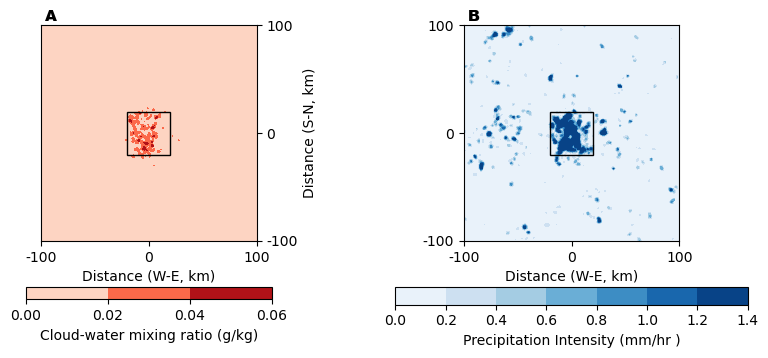

In [136]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import matplotlib.colors as mcolors
colors = [(1, 1, 1)] + plt.cm.YlGnBu(np.linspace(0, 1, 256)).tolist()[32:] 
print(len(plt.cm.YlGnBu(np.linspace(0, 1, 256)).tolist()[32:] ))
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(boundaries=[0, 0.2, 0.4, 0.6, 0.8, 1.2], ncolors=cmap.N)

def rain_plot(ax):
    rect = patches.Rectangle((130, 130), 40, 40, linewidth=1, edgecolor='k', facecolor='none')
    spa_pre11 = spa_pre
    # spa_pre11[spa_pre11<0.1] = np.nan
    spa_pre11[spa_pre11>1.4] = 1.4
    c_level=np.arange(0,1.6,0.2)
    rain_contour = ax.contourf(spa_pre11 ,levels=c_level,  cmap="Blues",extend='neither')

    # ax.plot([lons[100,100], lons[250,250]], [lats[250,250], lats[100,100]], 
    #         linestyle='--', color='grey', transform=ccrs.PlateCarree())
    # ax.plot([lons[50,50], lons[200,200]], [lats[200,200], lats[50,50]], 
    #         linestyle='--', color='grey', transform=ccrs.PlateCarree())
    ax.add_patch(rect)
    
    ax.set_xlabel('Distance (W-E, km)',fontsize=10)
    # ax.set_ylabel('Distance (S-N, km)',fontsize=10)
    ax.set_xticks([50,150,250])
    ax.set_yticks([50,150,250])
    ax.set_xticklabels(["-100","0","100"],fontsize=10)  # Adjust according to your desired ticks
    ax.set_yticklabels(["-100","0","100"],fontsize=10)  # Adjust according to your desired ticks
    ax.set_ylim(50,250)
    ax.set_xlim(50,250)
    cbar= fig.colorbar(rain_contour,
             orientation='horizontal',extend='both',
             label = "Precipitation Intensity (mm/hr )")
    ax.set_aspect('equal', adjustable='box')
    return ax


colors = [(1, 1, 1)] + plt.cm.YlGnBu(np.linspace(0, 1, 256)).tolist()[32:] 
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(boundaries=[0, 0.2, 0.4, 0.6, 0.8, 1.2, 1.4, 1.6], ncolors=cmap.N)
def cloud_plot(ax):
    import matplotlib.patches as patches

    rect = patches.Rectangle((130, 130), 40, 40, linewidth=1, edgecolor='k', facecolor='none')
    spa_cloud11 = spa_cloud.copy()

    print(np.mean(spa_cloud11[130:170, 130:170]), np.max(spa_cloud11))

    spa_cloud11[spa_cloud11 > 1.2 / 1e3] = 1.2 / 1e3
    c_level = np.arange(0, 0.08, 0.02)
    rain_contour = ax.contourf(spa_cloud11 * 1e3, levels=c_level, cmap="Reds", extend='neither')

    ax.add_patch(rect)
    
    # 设置刻度和标签
    ax.set_xticks([50, 150, 250])
    ax.set_yticks([50, 150, 250])
    ax.set_xticklabels(["-100", "0", "100"], fontsize=10)
    ax.set_yticklabels(["-100", "0", "100"], fontsize=10)

    # 设置边界
    ax.set_xlim(50, 250)
    ax.set_ylim(50, 250)
    ax.set_aspect('equal', adjustable='box')

    # 移动坐标轴标签与刻度到右/上
    # ax.xaxis.set_label_position('top')
    ax.yaxis.set_label_position('right')
    # ax.tick_params(axis='x', labeltop=True, labelbottom=False)
    ax.tick_params(axis='y', labelright=True, labelleft=False)
    ax.set_xlabel('Distance (W-E, km)', fontsize=10)
    ax.set_ylabel('Distance (S-N, km)', fontsize=10)
    ax.tick_params(
    axis='y',           # y 轴刻度设置
    direction='out',    # 朝外（向右）
    labelright=True,    # 显示右侧标签
    right=True,         # 启用右侧刻度
    left=False          # 关闭左侧刻度（可选）
)
    # 缩短 colorbar
    cbar = fig.colorbar(
        rain_contour,
        ax=ax,
        orientation='horizontal',
        extend='both',
        shrink = 0.7,
        label=r"Cloud-water mixing ratio (g/kg)"
    )

    return ax

fig , ax = plt.subplots(1,2,figsize = (10,4))

ax[1]=rain_plot(ax[1])
ax[0]=cloud_plot(ax[0])

dict_title_cfg = dict(fontsize=11, fontweight="heavy", ha="left", fontfamily="Arial")
ax[0].text(0.02, 1.02, "A", **dict_title_cfg, transform=ax[0].transAxes)
ax[1].text(0.02, 1.02,"B", **dict_title_cfg, transform=ax[1].transAxes)
# axs[2].text(0.02, 1.02,"C", **dict_title_cfg, transform=axs[1].transAxes)

fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/spatial_wrf.pdf", dpi=300, bbox_inches="tight")
fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/spatial_wrf.eps", dpi=400, bbox_inches="tight")
fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/spatial_wrf.png", dpi=400, bbox_inches="tight")


### afternoon vertial mositure flux profile

In [118]:
import matplotlib.pyplot as plt
import numpy as np
total_files = [fr"20200707",fr"20200708",fr"20200709",fr"20200710",
                fr"20200711",fr"20200712",fr"20200713",fr"20200714",fr"20200715",
                fr"20200716",fr"20200717",fr"20200718",fr"20200719",fr"20200720",
                fr"20200721",fr"20200722",fr"20200723",fr"20200724",fr"20200725",
                fr"20200726",fr"20200727",fr"20200728",fr"20200729",fr"20200730",]
total_array = np.zeros([12, 24, 100, 299])
for file in total_files:
    test_array = np.load(fr"F:\day_cycle\data\wrfout_100levels\urban_case/totalprofile_{file}.npy")
    total_array+=test_array
total_array = total_array/len(total_files)
a = total_array
print(a.shape)
t,p,q,w = np.zeros([360,24]),np.zeros([360,24]),np.zeros([360,24]),np.zeros([360,24])
for i in range(24):
    t[:,i] = np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[1,i,:,130:170],axis=1))
    q[:,i] = np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[3,i,:,130:170],axis=1))
    +np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[4,i,:,130:170],axis=1))+np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[5,i,:,130:170],axis=1))+np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[6,i,:,130:170],axis=1))+np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[7,i,:,130:170],axis=1))
    w[:,i] = np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[2,i,:,130:170],axis=1))
    p[:,i] = np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[10,i,:,130:170],axis=1))

vq,thetata = np.zeros([360,24]),np.zeros([360,24])

R_d = 287.0      # constant
c_p = 1005.0     # constant
P0 = 100000.0    # constant
g = 9.80665      # constant
kappa = R_d / c_p
def calculate_vertical_moisture_flux(pressure, q, theta, w):
    # 1. calculate the actual temperature
    T = theta * (pressure / P0)**(-kappa)
    
    # 2. calculate the potential temperature
    Tv = T * (1 + 0.608 * q)
    
    # 3. calculate the air density
    rho = pressure / (R_d * Tv)
    
    # 4. calculate moisuter flux
    F_q = rho * q * w
    
    return F_q, rho, T

for i in range(360):
    for j in range(24):
        vq[i,j],aaa,thetata[i,j] = calculate_vertical_moisture_flux(p[i,j], q[i,j], t[i,j], w[i,j])
print(vq.shape)

(12, 24, 100, 299)
(360, 24)


<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\32952\AppData\Local\Temp\ipykernel_34348\1099663182.py:10: SyntaxWarning: invalid escape sequence '\m'
  cb = fig.colorbar(contourf, drawedges=True, orientation='horizontal',spacing='uniform',label="Vertical Moisture Flux $(10^{-3}\mathrm{kg{\cdot}m^{-2}{\cdot}s^{-1}}$)",pad=0.16)


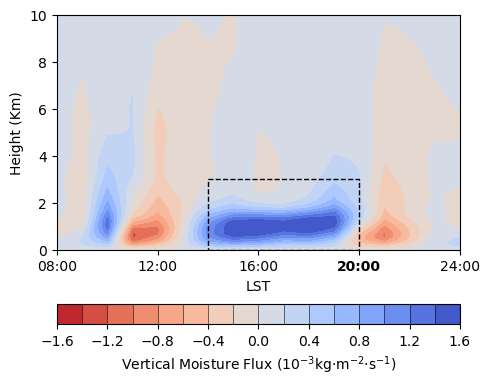

In [119]:
def show_afternoon_profile(ax,data):
    import matplotlib.patches as patches

    
    c_level=np.arange(-1.6,1.8,0.2)
    # data[data==0]=np.nan
    # data[data>0.0001]=0.0001
    data[data>1.58] = 1.59
    contourf = ax.contourf(range(24), range(360), data,levels = c_level, cmap="coolwarm_r",extend='neither')
    cb = fig.colorbar(contourf, drawedges=True, orientation='horizontal',spacing='uniform',label="Vertical Moisture Flux $(10^{-3}\mathrm{kg{\cdot}m^{-2}{\cdot}s^{-1}}$)",pad=0.16)
    ax.set_ylim(0,200)
    ax.set_xlim(0,16)
    ax.set_xticks([0,4,8,12,16],["08:00","12:00","16:00","20:00","24:00"])
    ax.set_yticks([0,40,80,120,160,200],["0","2","4","6","8","10"])
    for label, color in zip(ax.get_xticklabels(), ['k', 'k', 'k', 'k', 'k']):
        label.set_color(color)
    labels =ax.get_xticklabels()

    labels[-2].set_fontweight('bold') 


    # the box in the figure
    x0, y0 = 6, 0   # left bottom location
    x1, y1 = 12, 60  # upper right location
    
    width = x1 - x0
    height = y1 - y0
    
    rect = patches.Rectangle((x0, y0), width, height, 
                            linewidth=1, edgecolor='k', linestyle="--",facecolor='none')
    ax.add_patch(rect)

    return ax
fig, ax = plt.subplots(1, 1, figsize=(5, 4))


contourf0 = show_afternoon_profile(ax, vq*1000 )
# ax.set_title("Control Case", color="k")
ax.set_ylabel("Height (Km)", color="k")
ax.set_xlabel("LST", color="k")

plt.tight_layout()
plt.show()

### afternoon UHI circulation

In [120]:
total_files = [fr"20200707",fr"20200708",fr"20200709",fr"20200710",
             fr"20200711",fr"20200712",fr"20200713",fr"20200714",fr"20200715",
             fr"20200716",fr"20200717",fr"20200718",fr"20200719",fr"20200720",
             fr"20200721",fr"20200722",fr"20200723",fr"20200724",fr"20200725",
             fr"20200726",fr"20200727",fr"20200728",fr"20200729",fr"20200730",]
total_array = np.zeros([4, 24, 200, 299])
for file in total_files:
    test_array = np.load(fr"F:\day_cycle\data\wrfout_100levels\urban_case/profile_{file}.npy")
    total_array+=test_array
total_array = total_array/len(total_files)

[-5.0000000e-01 -4.8000000e-01 -4.6000000e-01 -4.4000000e-01
 -4.2000000e-01 -4.0000000e-01 -3.8000000e-01 -3.6000000e-01
 -3.4000000e-01 -3.2000000e-01 -3.0000000e-01 -2.8000000e-01
 -2.6000000e-01 -2.4000000e-01 -2.2000000e-01 -2.0000000e-01
 -1.8000000e-01 -1.6000000e-01 -1.4000000e-01 -1.2000000e-01
 -1.0000000e-01 -8.0000000e-02 -6.0000000e-02 -4.0000000e-02
 -2.0000000e-02  4.4408921e-16  2.0000000e-02  4.0000000e-02
  6.0000000e-02  8.0000000e-02  1.0000000e-01  1.2000000e-01
  1.4000000e-01  1.6000000e-01  1.8000000e-01  2.0000000e-01
  2.2000000e-01  2.4000000e-01  2.6000000e-01  2.8000000e-01
  3.0000000e-01  3.2000000e-01  3.4000000e-01  3.6000000e-01
  3.8000000e-01  4.0000000e-01  4.2000000e-01  4.4000000e-01
  4.6000000e-01  4.8000000e-01  5.0000000e-01]
(200, 299)
(200, 299)


Text(0.02, 1.02, 'a')

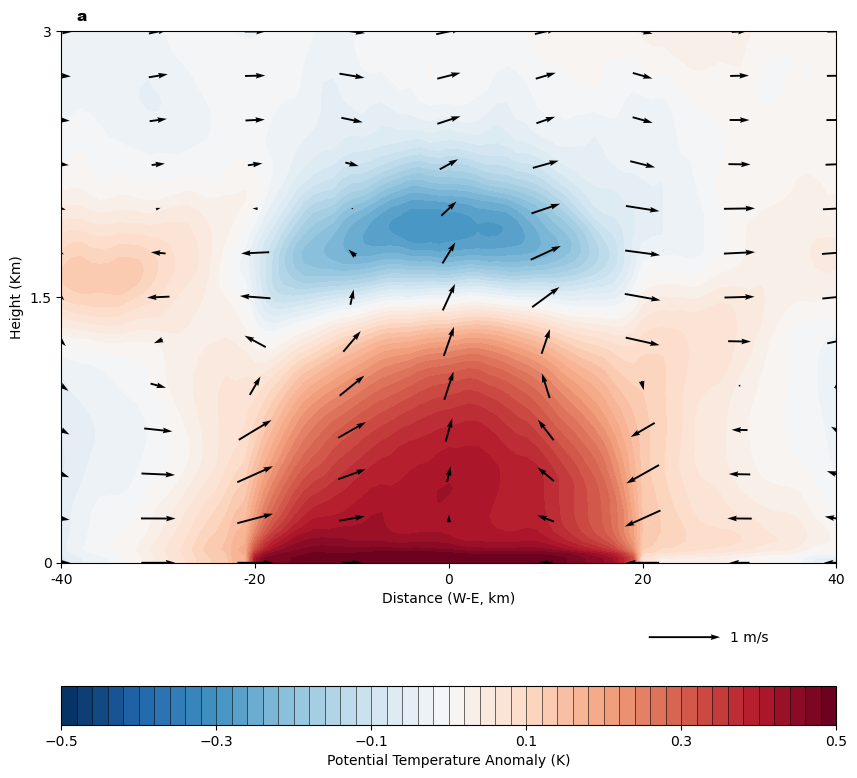

In [121]:

import numpy as np
import matplotlib.pyplot as plt
def to_after_temperature(ax,testarray):
    test = testarray.copy()
    for i in range(200):
        for t in range(24):
            test[1,t,i,:] = test[1,t,i,:]-np.mean(test[1,t,i,50:250])
    c_level=np.arange(-0.5,0.52,0.02)
    print(c_level)
    test[test<-0.5] = -0.5
    test[test>0.5] = 0.5
    print(np.mean(test[1,6:12,:],axis=0).shape)
    print(test[1,1,:].shape)
    contourf = ax.contourf(range(299), range(200), np.mean(test[1,6:12,:],axis=0),levels=c_level,  cmap="RdBu_r",extend='neither')
    Q = ax.quiver(range(299)[::10], range(200)[::10], np.mean(test[0,6:12,:],axis=0)[::10,::10] ,  np.mean(test[3,6:12,:],axis=0)[::10,::10]*5, pivot='mid')
    qk = ax.quiverkey(Q, 0.85, -.14, 1, fr'1 m/s', labelpos='E')
    cb = fig.colorbar(contourf, drawedges=True, orientation='horizontal',spacing='uniform',label="Potential Temperature Anomaly (K)",pad=0.16)
    ax.set_xticks([130,170],["",""])
    ax.set_yticks([0,60,120],["0","1.5","3"])
    ax.set_ylabel("Height (Km)")
    ax.set_xticks([110,130,150,170,190])
    ax.set_xticklabels(["-40","-20","0","20","40"],fontsize=10) 
    ax.set_xlabel("Distance (W-E, km)")
    ax.set_ylim(0,120)
    ax.set_xlim(110,190)
    cb.set_ticks([-0.5, -0.3,-0.1,0.1,0.3,0.5])  # Set the tick locations (scaled according to the data range)
    # cb.set_ticklabels(["-0.5", "-0.25", "0", "0.25", "0.5"])
    return ax





fig , ax = plt.subplots(1,1,figsize = (10,10))
localtime = 10
ax = to_after_temperature(ax,total_array)


dict_title_cfg = dict(fontsize=11, fontweight="heavy", ha="left", fontfamily="Arial")
ax.text(0.02, 1.02, "a", **dict_title_cfg, transform=ax.transAxes)




[-5.0000000e-01 -4.8000000e-01 -4.6000000e-01 -4.4000000e-01
 -4.2000000e-01 -4.0000000e-01 -3.8000000e-01 -3.6000000e-01
 -3.4000000e-01 -3.2000000e-01 -3.0000000e-01 -2.8000000e-01
 -2.6000000e-01 -2.4000000e-01 -2.2000000e-01 -2.0000000e-01
 -1.8000000e-01 -1.6000000e-01 -1.4000000e-01 -1.2000000e-01
 -1.0000000e-01 -8.0000000e-02 -6.0000000e-02 -4.0000000e-02
 -2.0000000e-02  4.4408921e-16  2.0000000e-02  4.0000000e-02
  6.0000000e-02  8.0000000e-02  1.0000000e-01  1.2000000e-01
  1.4000000e-01  1.6000000e-01  1.8000000e-01  2.0000000e-01
  2.2000000e-01  2.4000000e-01  2.6000000e-01  2.8000000e-01
  3.0000000e-01  3.2000000e-01  3.4000000e-01  3.6000000e-01
  3.8000000e-01  4.0000000e-01  4.2000000e-01  4.4000000e-01
  4.6000000e-01  4.8000000e-01  5.0000000e-01]
(200, 299)
(200, 299)


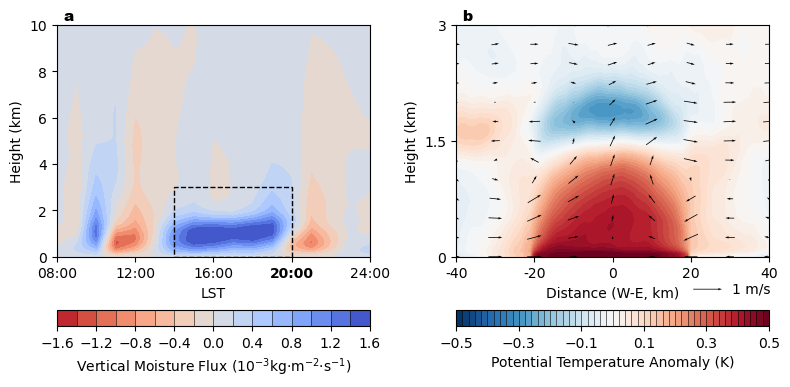

In [122]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# 绘制control案例，并添加显著性标记
contourf0 = show_afternoon_profile(axs[0], vq*1000 )
# ax.set_title("Control Case", color="k")
axs[0].set_ylabel("Height (km)", color="k")
axs[0].set_xlabel("LST", color="k")

# 绘制control案例，并添加显著性标记
contourf1 = to_after_temperature(axs[1], total_array )
axs[1].set_ylabel("Height (km)", color="k")
axs[0].text(0.02, 1.02, "a", **dict_title_cfg, transform=axs[0].transAxes)
axs[1].text(0.02, 1.02, "b", **dict_title_cfg, transform=axs[1].transAxes)
plt.tight_layout()
plt.show()
fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/afternoon_UHI.pdf", dpi=300, bbox_inches="tight")
fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/afternoon_UHI.eps", dpi=400, bbox_inches="tight")
fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/afternoon_UHI.png", dpi=400, bbox_inches="tight")

### control vs urban in cloud

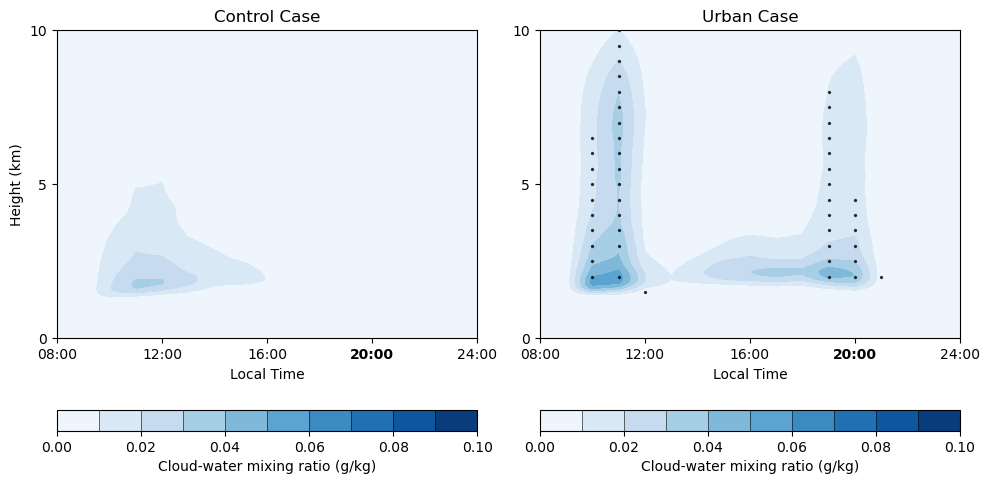

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats  # 

def show_vari1(ax, data, significance_mask=None):
    c_level = np.arange(0, 0.11, 0.01)
    data[data > 0.0001] = 0.0001
    contourf = ax.contourf(range(24), range(360), data*1000, 
                          levels=c_level, cmap="Blues", extend='neither')
    cb = fig.colorbar(contourf, drawedges=True, orientation='horizontal',spacing='uniform',label="Cloud-water mixing ratio (g/kg)",pad=0.16)
    

    if significance_mask is not None:

        X, Y = np.meshgrid(range(24), range(360))
        
    
        X_ds = X[::10, :]  # 
        Y_ds = Y[::10, :]  # 
        mask_ds = significance_mask[::10, :]  # 
        
        
        ax.scatter(X_ds[mask_ds], Y_ds[mask_ds], 
                  color='k', s=2, alpha=0.7, marker='o')  # 
    
    ax.set_ylim(0, 200)
    ax.set_xlim(0, 16)
    ax.set_xticks([0,4,8,12,16],["08:00","12:00","16:00","20:00","24:00"])
    ax.set_yticks([0, 100, 200], ["0", "5", "10"])
    for label, color in zip(ax.get_xticklabels(), ['k', 'k', 'k', 'k', 'k']):
        label.set_color(color)
    labels =ax.get_xticklabels()
    labels[-2].set_fontweight('bold')
    return ax


control_daily = []  
urban_daily = []    

total_files = [fr"20200707", fr"20200708", fr"20200709", fr"20200710",
              fr"20200711", fr"20200712", fr"20200713", fr"20200714", fr"20200715",
              fr"20200716", fr"20200717", fr"20200718", fr"20200719", fr"20200720",
              fr"20200721", fr"20200722", fr"20200723", fr"20200724", fr"20200725",
              fr"20200726", fr"20200727", fr"20200728", fr"20200729", fr"20200730"]


for file in total_files:
    test_array = np.load(fr"F:\day_cycle\data\wrfout_100levels\control_case/totalprofile_{file}.npy")
    daily_profile = np.zeros([360, 24])
    for i in range(24):
        # interpolted
        daily_profile[:, i] = np.interp(
            range(0, 18000, 50),
            np.mean(test_array[0, i, :, 130:170], axis=1),
            np.mean(test_array[4, i, :, 130:170], axis=1)
        )
    control_daily.append(daily_profile)

# urban case
for file in total_files:
    test_array = np.load(fr"F:\day_cycle\data\wrfout_100levels\urban_case/totalprofile_{file}.npy")
    daily_profile = np.zeros([360, 24])
    for i in range(24):
        daily_profile[:, i] = np.interp(
            range(0, 18000, 50),
            np.mean(test_array[0, i, :, 130:170], axis=1),
            np.mean(test_array[4, i, :, 130:170], axis=1)
        )
    urban_daily.append(daily_profile)


control_daily = np.array(control_daily)  
urban_daily = np.array(urban_daily)      


b3_monthly = np.mean(control_daily, axis=0)  # control mean
b2_monthly = np.mean(urban_daily, axis=0)    # urban mean


p_values1 = np.zeros((360, 24))
p_values2 = np.zeros((360, 24))

for h in range(360):
    for t in range(24):
        # t test
        t_stat, p_val = stats.ttest_ind(
            control_daily[:, h, t],
            urban_daily[:, h, t],
            equal_var=False  # (Welch's t-test)
        )
        p_values1[h, t] = p_val


# 
significance_mask1 = p_values1 < 0.001
#

#
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#
contourf0 = show_vari(ax[0], b3_monthly)
ax[0].set_title("Control Case", color="k")
ax[0].set_ylabel("Height (km)", color="k")
ax[0].set_xlabel("Local Time", color="k")

# 
contourf1 = show_vari1(ax[1], b2_monthly, significance_mask1)
ax[1].set_title("Urban Case", color="k")
ax[1].set_xlabel("Local Time", color="k")



plt.tight_layout()
plt.show()



### est and et

#### for urban case and control case

In [30]:
import matplotlib.pyplot as plt
import numpy as np
total_files = [fr"20200707",fr"20200708",fr"20200709",fr"20200710",
                fr"20200711",fr"20200712",fr"20200713",fr"20200714",fr"20200715",
                fr"20200716",fr"20200717",fr"20200718",fr"20200719",fr"20200720",
                fr"20200721",fr"20200722",fr"20200723",fr"20200724",fr"20200725",
                fr"20200726",fr"20200727",fr"20200728",fr"20200729",fr"20200730",]
total_array = np.zeros([12, 24, 100, 299])
for file in total_files:
    test_array = np.load(fr"F:\day_cycle\data\wrfout_100levels\urban_case/totalprofile_{file}.npy")
    total_array+=test_array
total_array = total_array/len(total_files)
a = total_array
print(a.shape)
t,p,q,w = np.zeros([360,24]),np.zeros([360,24]),np.zeros([360,24]),np.zeros([360,24])
for i in range(24):
    t[:,i] = np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[1,i,:,130:170],axis=1))
    q[:,i] = np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[3,i,:,130:170],axis=1))
    +np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[4,i,:,130:170],axis=1))+np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[5,i,:,130:170],axis=1))+np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[6,i,:,130:170],axis=1))+np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[7,i,:,130:170],axis=1))
    w[:,i] = np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[2,i,:,130:170],axis=1))
    p[:,i] = np.interp(range(0,18000,50), np.mean(a[0,i,:,130:170],axis=1),np.mean(a[10,i,:,130:170],axis=1))


(12, 24, 100, 299)


In [31]:
et,est = np.zeros([360,24]),np.zeros([360,24])
def get_temperature(theta, p):
    kappa = 0.2854
    temp = theta * (p / 100000.0) ** kappa
    return temp
def actual_vapor_pressure(qvapor, p):
    epsilon = 0.622
    e = (qvapor * p) / (epsilon + (1 - epsilon) * qvapor)
    return e/100
def saturation_vapor_pressure(temp_k):
    temp_c = temp_k - 273.15
    est = np.where(temp_c >= 0,
                  6.112 * np.exp((17.67 * temp_c) / (temp_c + 243.5)),
                  6.112 * np.exp((22.46 * temp_c) / (temp_c + 272.62)))
    return est 

for i in range(360):
    for j in range(24):
        t1 = get_temperature(t[i,j], p[i,j])
        est[i,j] = saturation_vapor_pressure(t1)
        et[i,j] = actual_vapor_pressure(q[i,j], p[i,j])

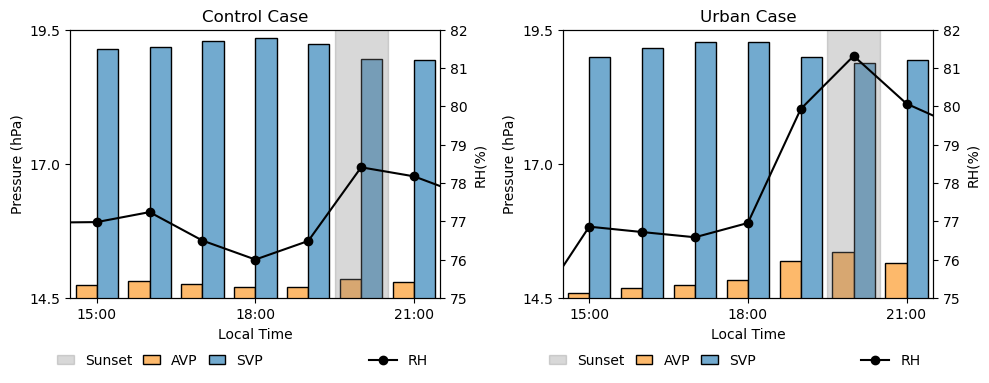

In [130]:
def et_est_2_4_km(ax,et,est):

    x = np.arange(24)
    bar_values1 = np.mean(et[40:80,:],axis=0)
    bar_values2 = np.mean(est[40:80,:],axis=0)
    line_values = bar_values1/bar_values2*100
    bar_width = 0.4
    bars1 = ax.bar(x - bar_width / 2, bar_values1, width=bar_width,ec="k",
                   color=(253/255,185/255,107/255), label='AVP')
    bars2 = ax.bar(x + bar_width / 2, bar_values2, width=bar_width,ec="k",
                   color=(114/255,170/255,207/255), label='SVP')

    ax2 = ax.twinx()
    ax2.plot(x, line_values, color='k', marker='o',label = "RH")
    ax.set_ylim(14.5,19.5)
    ax2.set_ylim(75,82)

    ax.set_ylabel('Pressure (hPa)')
    ax2.set_ylabel('RH(%)')
    ax.fill_between(
    x=[11.5, 12.5],
    y1=0, y2=100,
    color='grey', alpha=0.3,label = "Sunset")

    ax.set_xlim(6.5,13.5)
    ax.set_xticks([7,10,13],["15:00","18:00","21:00"])
    ax.set_yticks([14.5,17,19.5],["14.5","17.0","19.5"])
    ax.set_xlabel("Local Time")

    leg1 = ax.legend(loc='upper left',bbox_to_anchor=(-0.07, -0.16), ncol=3, handlelength=1.2, columnspacing=0.8)
    leg1.get_frame().set_linewidth(0)
    leg2 = ax2.legend(loc='upper right',bbox_to_anchor=(1, -0.16))
    leg2.get_frame().set_linewidth(0)

    return ax

fig, axs = plt.subplots(1,2,figsize=(10, 4))
et_est_2_4_km(axs[1],et,est)
et_est_2_4_km(axs[0],et_c,est_c)
axs[0].set_title("Control Case")
axs[1].set_title("Urban Case")
plt.tight_layout()
plt.show()

### Plot All for sunset poriod

1.3382772282000861e-05 7.078890354003775e-05


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


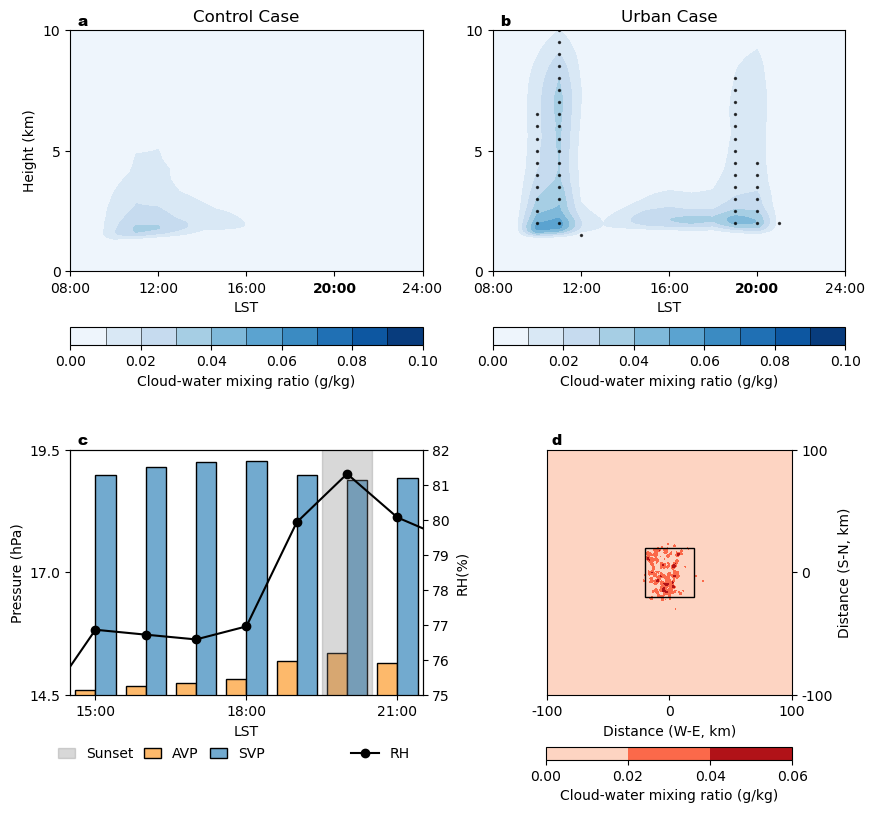

In [138]:
fig , axs = plt.subplots(2,2,figsize = (10,10))

axs[0,0]=show_vari(axs[0,0],b3_monthly)
axs[0,1]=show_vari1(axs[0,1],b2_monthly, significance_mask1)

axs[0,0].set_ylabel("Height (km)", color="k")
axs[0,0].set_xlabel("LST", color="k")
axs[0,1].set_xlabel("LST", color="k")

axs[0,0].set_title("Control Case", color="k")
axs[0,1].set_title("Urban Case", color="k")

total_array = np.zeros([4, 24, 200, 299])
for file in total_files:
    test_array = np.load(fr"F:\day_cycle\data\wrfout_100levels\urban_case/profile_{file}.npy")
    total_array+=test_array
total_array = total_array/len(total_files)
localtime = 10
axs[1,1] = cloud_plot(axs[1,1])
axs[1,0] = et_est_2_4_km(axs[1,0],et,est)

axs[1,0].set_xlabel("LST", color="k")

dict_title_cfg = dict(fontsize=11, fontweight="heavy", ha="left", fontfamily="Arial")
axs[0,0].text(0.02, 1.02, "a", **dict_title_cfg, transform=axs[0,0].transAxes)
axs[0,1].text(0.02, 1.02,"b", **dict_title_cfg, transform=axs[0,1].transAxes)
axs[1,0].text(0.02, 1.02,"c", **dict_title_cfg, transform=axs[1,0].transAxes)
axs[1,1].text(0.02, 1.02,"d", **dict_title_cfg, transform=axs[1,1].transAxes)
pos = axs[1,0].get_position()  # 
axs[1,0].set_position([pos.x0, pos.y0+0.105, pos.width, pos.height * 0.7])



fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/sunset_convection.pdf", dpi=300, bbox_inches="tight")
fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/sunset_convection.eps", dpi=400, bbox_inches="tight")
fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/sunset_convection.png", dpi=400, bbox_inches="tight")

## Energy balance and Water budget

### read data for energy balance

In [47]:
import netCDF4 as nc
import glob
import numpy as np
control_sfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
control_lfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
control_gfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
num = 0
for file in glob.glob(fr"F:\day_cycle\data\wrfout_100levels\control_case/wrfout_d01_2020*"):
    dataset = nc.Dataset(file, 'a')
    print(file)
    for i in range(0,24):
        control_sfx[num*24+i] = np.mean(np.array(dataset["HFX"][i,130:170,130:170]))
        control_lfx[num*24+i] = np.mean(np.array(dataset["LH"][i,130:170,130:170]))
        control_gfx[num*24+i] = np.mean(np.array(dataset["GRDFLX"][i,130:170,130:170]))
    num+=1
    dataset.close()


urban_sfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
urban_lfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
urban_gfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
num = 0
for file in glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"):
    dataset = nc.Dataset(file, 'a')
    print(file)
    for i in range(0,24):
        urban_sfx[num*24+i] = np.mean(np.array(dataset["HFX"][i,130:170,130:170]))
        urban_lfx[num*24+i] = np.mean(np.array(dataset["LH"][i,130:170,130:170]))
        urban_gfx[num*24+i] = np.mean(np.array(dataset["GRDFLX"][i,130:170,130:170]))
    num+=1
    dataset.close()

F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-01_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-02_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-03_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-04_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-05_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-06_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-07_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-08_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-09_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-10_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-11_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-12_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfo

### data in fig (energy balance)

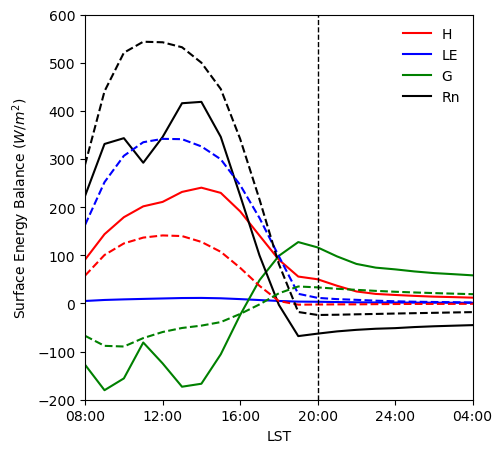

In [48]:
import matplotlib.pyplot as plt
def daily_cycle_of_energy(ax):
    line1 = np.mean(urban_sfx[144:].reshape([24,24]),axis=(0))
    ax.plot(line1,"r-",label=fr"H")

    line2 = np.mean(urban_lfx[144:].reshape([24,24]),axis=(0))
    ax.plot(line2,"b-",label=fr"LE")

    line3 = np.mean(urban_gfx[144:].reshape([24,24]),axis=(0))
    ax.plot(line3,"g-",label=fr"G")

    ax.plot(line1 + line2 - line3,"k-",label=fr"Rn")

    line11 = np.mean(control_sfx[144:].reshape([24,24]),axis=(0))
    ax.plot(line11,"r--")

    line22 = np.mean(control_lfx[144:].reshape([24,24]),axis=(0))
    ax.plot(line22,"b--")

    line33 = np.mean(control_gfx[144:].reshape([24,24]),axis=(0))
    ax.plot(line33,"g--")
    ax.axvline(12,color = "k",linestyle = "--",linewidth =1)
    ax.plot(line11 + line22 - line33,"k--")
    # ax.scatter(11,line3[11])
    return ax
fig , ax = plt.subplots(1,1,figsize = (5,5))
ax = daily_cycle_of_energy(ax)
ax.set_ylabel("Surface Energy Balance ($W/m^2$)")
ax.set_xticks([0,4,8,12,16,20],["08:00","12:00","16:00","20:00","24:00","04:00"])
ax.set_xlabel("LST")
ax.set_ylim(-200,600)
ax.set_xlim(0,20)
ax.legend(frameon=False)

### Read Water budget data

In [ ]:
import numpy as np
import netCDF4 as nc
import glob
import metpy.constants as constants  #里面是常数
import metpy.calc as mpcalc
def to_VQ(file_path):
    savename = file_path[-19:-15] + file_path[-14:-12] + file_path[-11:-9]
    dataset = nc.Dataset(file_path, 'a')
    m = np.array(dataset["MU"])+np.array(dataset["MUB"])
    dnw = np.array(dataset["DNW"])
    print(m.shape,dnw.shape)
    # print(m[20,:,1])
    print(np.sum(dnw[20,:]))
    Q1 = np.array(dataset["QVAPOR"])
    Q2 = np.array(dataset["QCLOUD"])
    Q3 = np.array(dataset["QRAIN"])
    Q4 = np.array(dataset["QICE"])
    Q5 = np.array(dataset["QSNOW"])
    q_total = Q1+Q2+Q3+Q4+Q5
    result = dnw[:, :, np.newaxis, np.newaxis] * q_total
    result1 = np.sum(result,axis =1)*m
    result2 = np.mean(result1[:,130:170,130:170],axis=(1,2))
    print(result2)
    return result2


urban_array = np.zeros([24,30])
# For urban case
import glob
files = glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01*")[0:]
num=0
for file in files:
    print(file)
    urban_array[:,num] = to_VQ(file)
    num+=1
np.savetxt(fr"F:\day_cycle\data\wrfout_100levels\urban_case//totalq_urban.txt",urban_array)


rural_array = np.zeros([24,30])
# For control case
import glob
files = glob.glob(fr"F:\day_cycle\data\wrfout_100levels\control_case/wrfout_d01*")[:]
num=0
for file in files:
    print(file)
    rural_array[:,num] = to_VQ(file)
    num+=1
np.savetxt(fr"F:\day_cycle\data\wrfout_100levels\control_case/totalq_rural.txt",rural_array)

F:\day_cycle\data\wrfout_100levels\urban_case\wrfout_d01_2020-07-01_00_00_00
(24, 299, 299) (24, 100)
-1.0
[-511.43176 -511.0986  -511.13116 -512.9925  -517.5109  -525.38025
 -538.8208  -565.5437  -599.275   -626.9704  -619.6128  -612.4096
 -610.9094  -611.4521  -611.3739  -611.7939  -611.4598  -610.09033
 -609.5761  -608.66907 -607.916   -607.6941  -609.1955  -612.03   ]
F:\day_cycle\data\wrfout_100levels\urban_case\wrfout_d01_2020-07-02_00_00_00
(24, 299, 299) (24, 100)
-1.0
[-609.0549  -610.5499  -632.83374 -647.28174 -614.5585  -595.3562
 -594.48047 -594.688   -599.61304 -617.3895  -640.1945  -635.00183
 -635.4709  -631.581   -632.7591  -631.3024  -630.9589  -630.3313
 -626.9359  -626.7512  -624.9765  -625.5593  -623.54663 -623.59436]
F:\day_cycle\data\wrfout_100levels\urban_case\wrfout_d01_2020-07-03_00_00_00
(24, 299, 299) (24, 100)
-1.0
[-622.59    -621.3388  -630.4566  -643.52057 -646.54877 -621.344
 -607.84576 -610.1643  -617.9754  -627.58594 -641.6058  -651.00073
 -660.4788  

In [49]:
import netCDF4 as nc
import glob
import numpy as np
# urban_swfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
urban_pre = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
urban_e = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
num = 0
for file in glob.glob(fr"F:\day_cycle\data\wrfout_100levels\control_case/wrfout_d01_2020*"):
    dataset = nc.Dataset(file, 'a')
    print(file)
    for i in range(0,24):
        # urban_swfx[num*24+i] = np.mean(np.array(dataset["SWDOWN"][i,130:170,130:170]))
        urban_pre[num*24+i] = np.mean(np.array(dataset["RAINNC"][i,130:170,130:170]))
        urban_e[num*24+i] = np.mean(np.array(dataset["QFX"][i,130:170,130:170]))
    num+=1
    dataset.close()
# control_sw = urban_swfx
control_pre= urban_pre
control_e = urban_e
# urban_swfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
urban_pre = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
urban_e = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
num = 0
for file in glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"):
    dataset = nc.Dataset(file, 'a')
    print(file)
    for i in range(0,24):
        # urban_swfx[num*24+i] = np.mean(np.array(dataset["SWDOWN"][i,:,:]))
        urban_pre[num*24+i] = np.mean(np.array(dataset["RAINNC"][i,130:170,130:170]))
        urban_e[num*24+i] = np.mean(np.array(dataset["QFX"][i,130:170,130:170]))
    num+=1
    dataset.close()
# urban_sw = urban_swfx
urban_pre= urban_pre
urban_e = urban_e
urban_pre[1:] = urban_pre[1:] - urban_pre[:-1]
control_pre[1:] = control_pre[1:] - control_pre[:-1]

F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-01_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-02_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-03_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-04_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-05_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-06_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-07_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-08_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-09_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-10_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-11_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-12_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfo

### plot water source

[ 1.12648729 -0.93316446  3.60568001  2.2292558  -2.42356114 -0.92445234
  0.299803    1.53579875  0.81161239  1.02624837  1.21340072  3.01262009
  2.19698028 -1.81089252 -0.68477598 -0.01198843 -0.06104177 -0.19303344
 -0.07201578 -0.30162162 -0.25098173 -0.32282799 -0.10555696  0.72775206]


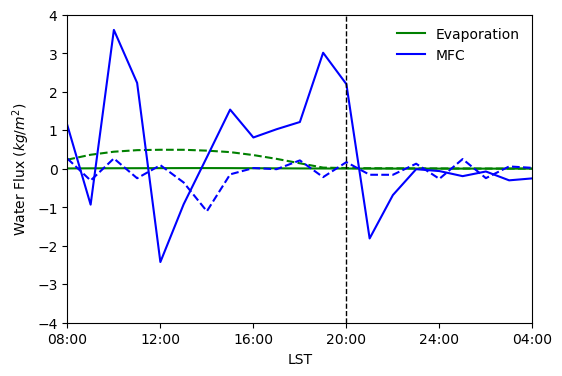

In [107]:
e11 = np.mean(urban_e[144:].reshape([24,24]),axis=(0))
e22 = np.mean(control_e[144:].reshape([24,24]),axis=(0))
# pre11 = np.mean(urban_pre[144:].reshape([24,24]),axis=(0))
# pre22 = np.mean(control_pre[144:].reshape([24,24]),axis=(0))
# vq_urban = np.loadtxt(fr"F:\day_cycle\data\wrfout_100levels\urban_case/totalq_urban.txt")
# vq_rural = np.loadtxt(fr"F:\day_cycle\data\wrfout_100levels\control_case/totalq_rural.txt")

# qlist1,qlist2 = [],[]
# for i in range(30):
#     for j in range(24):
#         qlist1.append(vq_urban[j,i])
#         qlist2.append(vq_rural[j,i])
# qlist1 = np.array(qlist1)
# qlist2 = np.array(qlist2)

# qlist1[1:] = qlist1[1:] - qlist1[:-1]
# qlist1[1:] = qlist1[1:] - qlist1[:-1]

# qlist1 = np.mean(qlist1[144:].reshape([24,24]),axis=(0))
# qlist2 = np.mean(qlist2[144:].reshape([24,24]),axis=(0))

vq_urban = np.loadtxt(fr"F:\day_cycle\data\wrfout_100levels\urban_case/vq_urban.txt")
vq_rural = np.loadtxt(fr"F:\day_cycle\data\wrfout_100levels\control_case/vq_rural.txt")

def water_balance1(ax):
    ax.plot(e11*3600,"g-",label=fr"Evaporation")
    ax.plot(e22*3600,"g--")
    # ax.plot(pre11,"b-",label=fr"Rain")
    # ax.plot(pre22,"b--")
    # ax.plot(qlist1/9.8-pre11+e11,"r-",label=fr"Water vapor divergence")
    # ax.plot(qlist2/9.8-pre22+e22,"r--")
    # ax.plot(qlist1/9.8,"k-",label=fr"Change of Water Vapor")
    # ax.plot(qlist2/9.8,"k--")
    # ax.fill([11,11,13,13],[-5,10,10,-5] , 'r', alpha=0.2)
    ax.set_ylim(-4,4)
    ax.set_ylabel("Water Flux ($kg/m^2$)", color="k")
    ax.set_xlabel("Local Time", color="k")
    ax.set_xlim(0,20)
    ax.set_xticks([0,4,8,12,16,20],["08:00","12:00","16:00","20:00","24:00","04:00"])
    ax.set_xlabel("LST")
    ax.plot(np.mean(vq_urban[:,6:],axis=1),"b-",label=fr"MFC")
    print(np.mean(vq_urban[:,6:],axis=1))
    ax.plot(np.mean(vq_rural[:,6:],axis=1),"b--")
    ax.axvline(12,color = "k",linestyle = "--",linewidth =1)
    ax.legend(frameon =False,loc = "upper right")
    return ax
fig,ax = plt.subplots(figsize=(6,4))
ax = water_balance1(ax)

### plot water content for whole air column

(24, 30)


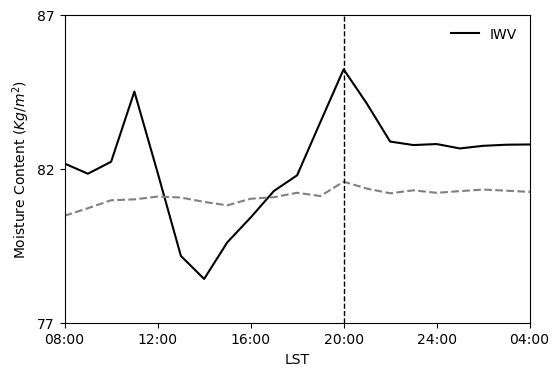

In [51]:
vq_urban_total = np.loadtxt(fr"F:\day_cycle\data\wrfout_100levels\urban_case/totalq_urban.txt")
vq_rural_total = np.loadtxt(fr"F:\day_cycle\data\wrfout_100levels\control_case/totalq_rural.txt")
print(vq_urban_total.shape)
import numpy as np
from scipy import stats



def two_water2(ax):
    red = "k"   # 深蓝
    gray = "gray" # 橙色

    # ax.plot(np.mean(vq_urban_total[:,6:]*(-1)/9.8,axis=1),linestyle = "-",label = "Urban Case",c = red)
    # ax.plot(np.mean(vq_rural_total[:,6:]*(-1)/9.8,axis=1),linestyle = "-",label = "Control Case",c = gray)

    # 计算每小时的平均值
    urban_iwv = np.mean(vq_urban_total[:,6:]*(-1)/9.8,axis=1)
    control_iwv = np.mean(vq_rural_total[:,6:]*(-1)/9.8,axis=1)
    
    # 计算95%置信区间
    urban_ci = np.zeros((2, 24))  # 存储置信区间上下界
    control_ci = np.zeros((2, 24))
    
    # 自由度为23 (24-1) 的t分布临界值
    t_critical = stats.t.ppf(0.975, 23)
    
    for hour in range(24):
        # 计算Urban案例的置信区间
        urban_std = np.std((vq_urban_total[:,6:]*(-1)/9.8)[hour,: ], ddof=1)
        urban_se = urban_std / np.sqrt(24)
        urban_ci[0, hour] = urban_iwv[hour] - t_critical * urban_se
        urban_ci[1, hour] = urban_iwv[hour] + t_critical * urban_se
        
        # 计算Control案例的置信区间
        control_std = np.std((vq_rural_total[:,6:]*(-1)/9.8)[hour,: ], ddof=1)
        control_se = control_std / np.sqrt(24)
        control_ci[0, hour] = control_iwv[hour] - t_critical * control_se
        control_ci[1, hour] = control_iwv[hour] + t_critical * control_se

    # ax.fill_between(range(24), control_ci[0], control_ci[1], color=gray, alpha=0.2)
    # ax.fill_between(range(24), urban_ci[0], urban_ci[1], color=red, alpha=0.27)

    ax.plot(np.mean(vq_urban_total[:,6:]*(-1)/9.8,axis=1),linestyle = "-",label = "IWV",c = red)
    ax.plot(np.mean(vq_rural_total[:,6:]*(-1)/9.8,axis=1),linestyle = "--",c = gray)
    # ax.scatter(12,np.mean(vq_rural[:,6:]*(-1)/9.8,axis=1)[12],c="r")
    # ax.scatter(12,np.mean(vq_urban[:,6:]*(-1)/9.8,axis=1)[12],c="r")
    # ax.fill([11,11,13,13],[-4,100,100,-4] , 'r', alpha=0.2)
    ax.set_ylim(77,87)
    ax.set_ylabel("Moisture Content ($Kg/m^2$)", color="k")
    ax.set_xlabel("Local Time", color="k")
    ax.set_xlim(0,20)
    ax.set_xticks([0,4,8,12,16,20],["08:00","12:00","16:00","20:00","24:00","04:00"])
    ax.set_yticks([77,82,87],[77,82,87])
    ax.set_xlabel("LST")
    ax.axvline(12,color = "k",linestyle = "--",linewidth =1)
    ax.legend(frameon =False,loc = "upper right")
    return ax
fig,ax = plt.subplots(figsize=(6,4))
ax = two_water2(ax)
# fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/total_water.pdf", dpi=300, bbox_inches="tight")
# fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/total_water.eps", dpi=400, bbox_inches="tight")
# fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/total_water.png", dpi=400, bbox_inches="tight")


### read data for precipitation

In [52]:
import netCDF4 as nc
import glob
import numpy as np
# urban_swfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
urban_pre = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
num = 0
for file in glob.glob(fr"F:\day_cycle\data\wrfout_100levels\control_case/wrfout_d01_2020*"):
    dataset = nc.Dataset(file, 'a')
    print(file)
    for i in range(0,24):
        # urban_swfx[num*24+i] = np.mean(np.array(dataset["SWDOWN"][i,130:170,130:170]))
        urban_pre[num*24+i] = np.mean(np.array(dataset["RAINNC"][i,130:170,130:170]))
    num+=1
    dataset.close()
# control_sw = urban_swfx
control_pre= urban_pre

# urban_swfx = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
urban_pre = np.zeros([int(len(glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"))*24)])
num = 0
for file in glob.glob(fr"F:\day_cycle\data\wrfout_100levels\urban_case/wrfout_d01_2020*"):
    dataset = nc.Dataset(file, 'a')
    print(file)
    for i in range(0,24):
        # urban_swfx[num*24+i] = np.mean(np.array(dataset["SWDOWN"][i,:,:]))
        urban_pre[num*24+i] = np.mean(np.array(dataset["RAINNC"][i,130:170,130:170]))
    num+=1
    dataset.close()
# urban_sw = urban_swfx
urban_pre= urban_pre

urban_pre[1:] = urban_pre[1:] - urban_pre[:-1]
control_pre[1:] = control_pre[1:] - control_pre[:-1]

F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-01_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-02_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-03_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-04_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-05_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-06_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-07_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-08_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-09_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-10_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-11_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfout_d01_2020-07-12_00_00_00
F:\day_cycle\data\wrfout_100levels\control_case\wrfo

### Plot for precipitation

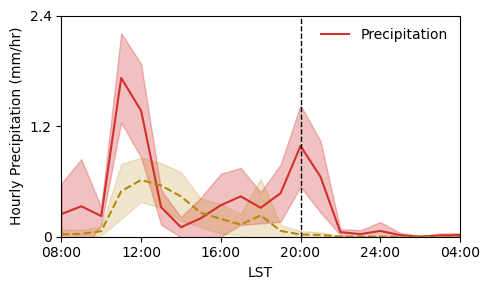

In [115]:
import numpy as np
from scipy import stats

def daily_cycle_of_rain(ax, data1, data2):
    # 
    red = '#D32F2F'
    gray = '#B8860B'
    urban_data = data1[144:].reshape([24, 24])
    control_data = data2[144:].reshape([24, 24])
    
    # 
    urban_mean = np.mean(urban_data, axis=0)
    control_mean = np.mean(control_data, axis=0)
    
    # 
    urban_ci = np.zeros((2, 24))  # 
    control_ci = np.zeros((2, 24))
    
    # 
    t_critical = stats.t.ppf(0.975, 23)
    
    for hour in range(24):
        # 
        urban_std = np.std(urban_data[:, hour], ddof=1)
        urban_se = urban_std / np.sqrt(24)
        urban_ci[0, hour] = urban_mean[hour] - t_critical * urban_se
        urban_ci[1, hour] = urban_mean[hour] + t_critical * urban_se
        
        # 
        control_std = np.std(control_data[:, hour], ddof=1)
        control_se = control_std / np.sqrt(24)
        control_ci[0, hour] = control_mean[hour] - t_critical * control_se
        control_ci[1, hour] = control_mean[hour] + t_critical * control_se
    
    # 
    ax.plot(urban_mean, c = red,linestyle="-", label="Precipitation")
    ax.fill_between(range(24), urban_ci[0], urban_ci[1], color=red, alpha=0.3)
    
    ax.plot(control_mean, c = gray,linestyle="--")
    ax.fill_between(range(24), control_ci[0], control_ci[1], color=gray, alpha=0.2)
    
    return ax

# 
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax = daily_cycle_of_rain(ax, urban_pre, control_pre)
ax.set_ylabel("Hourly Precipitation (mm/hr)")
# ax.set_xticks([0, 10, 20], ["08:00", "18:00", "04:00"])
ax.set_yticks([0, 1.2, 2.4], ["0", "1.2", "2.4"])
ax.set_xticks([0,4,8,12,16,20],["08:00","12:00","16:00","20:00","24:00","04:00"])
ax.set_xlabel("LST")
ax.set_ylim(0, 2.4)
ax.set_xlim(0, 20)
ax.legend(frameon=False)
ax.axvline(12,color = "k",linestyle = "--",linewidth =1)
plt.tight_layout()
plt.show()

### Plot all

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
C:\Users\32952\AppData\Local\Temp\ipykernel_34348\3816424348.py:12: SyntaxWarning: invalid escape sequence '\m'
  axs[0,1].set_ylabel("Heat Flux ($\mathrm{W/m^2}$)")
C:\Users\32952\AppData\Local\Temp\ipykernel_34348\3816424348.py:31: SyntaxWarning: invalid escape sequence '\m'
  axs[1,0].set_ylabel("Water Flux ($\mathrm{kg/m^2}$)")
C:\Users\32952\AppData\Local\Temp\ipykernel_34348\3816424348.py:36: SyntaxWarning: invalid escape sequence '\m'
  axs[1,1].set_ylabel("Moisture Content ($\mathrm{kg/m^2}$)")


[ 1.12648729 -0.93316446  3.60568001  2.2292558  -2.42356114 -0.92445234
  0.299803    1.53579875  0.81161239  1.02624837  1.21340072  3.01262009
  2.19698028 -1.81089252 -0.68477598 -0.01198843 -0.06104177 -0.19303344
 -0.07201578 -0.30162162 -0.25098173 -0.32282799 -0.10555696  0.72775206]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


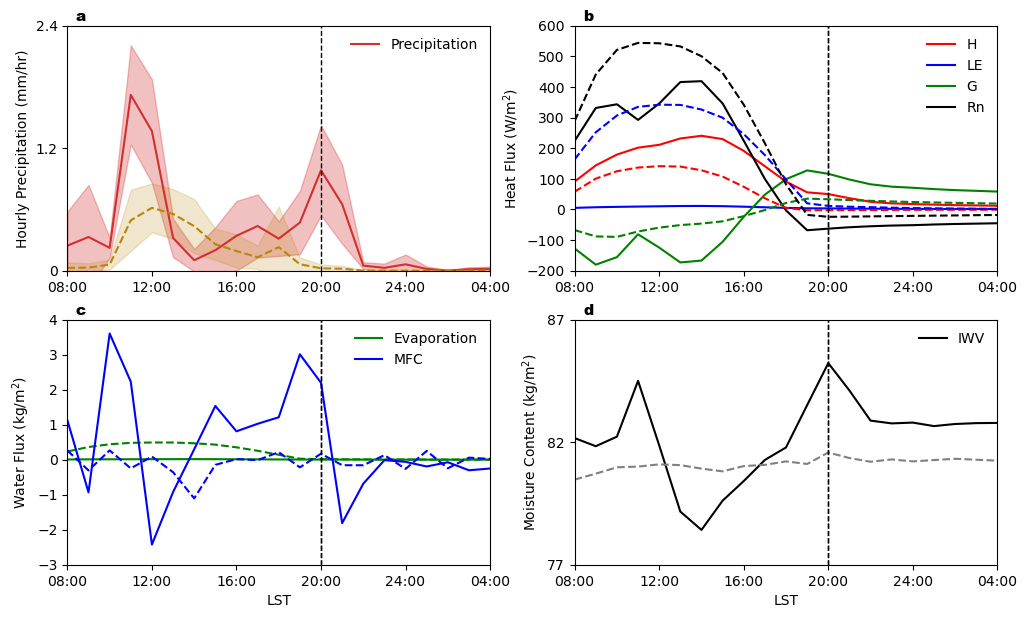

In [116]:
fig , axs = plt.subplots(2,2,figsize = (12,7))
axs[0,0] = daily_cycle_of_rain(axs[0,0],urban_pre,control_pre)
axs[0,0].set_ylabel("Hourly Precipitation (mm/hr)")
axs[0,0].set_xticks([0,4,8,12,16,20],["08:00","12:00","16:00","20:00","24:00","04:00"])
axs[0,0].set_yticks([0,1.2,2.4],["0","1.2","2.4"])
# axs[0].set_xlabel("LST")
axs[0,0].set_ylim(0,2.4)
axs[0,0].set_xlim(0,20)
axs[0,0].legend(frameon=False)

axs[0,1] = daily_cycle_of_energy(axs[0,1])
axs[0,1].set_ylabel("Heat Flux ($\mathrm{W/m^2}$)")
axs[0,1].set_xticks([0,4,8,12,16,20],["08:00","12:00","16:00","20:00","24:00","04:00"])
# axs[1].set_xlabel("LST")
axs[0,1].set_ylim(-200,600)
axs[0,1].set_xlim(0,20)
axs[0,1].legend(frameon=False)

axs[1,0] = water_balance1(axs[1,0])
axs[1,0].set_ylim(-3,4)
axs[1,0].set_xlim(0,20)
axs[1,0].set_xticks([0,4,8,12,16,20],["08:00","12:00","16:00","20:00","24:00","04:00"])
axs[1,1] = two_water2(axs[1,1])
axs[1,1].set_xlim(0,20)
axs[1,1].set_xticks([0,4,8,12,16,20],["08:00","12:00","16:00","20:00","24:00","04:00"])
dict_title_cfg = dict(fontsize=11, fontweight="heavy", ha="left", fontfamily="Arial")
axs[0,0].text(0.02, 1.02, "a", **dict_title_cfg, transform=axs[0,0].transAxes)
axs[0,1].text(0.02, 1.02,"b", **dict_title_cfg, transform=axs[0,1].transAxes)
axs[1,0].text(0.02, 1.02,"c", **dict_title_cfg, transform=axs[1,0].transAxes)
axs[1,1].text(0.02, 1.02,"d", **dict_title_cfg, transform=axs[1,1].transAxes)
axs[1,0].set_ylabel("Water Flux ($\mathrm{kg/m^2}$)")
axs[0,0].axvline(12,color = "k",linestyle = "--",linewidth =1)
axs[0,1].axvline(12,color = "k",linestyle = "--",linewidth =1)
axs[1,0].axvline(12,color = "k",linestyle = "--",linewidth =1)
axs[1,1].axvline(12,color = "k",linestyle = "--",linewidth =1)
axs[1,1].set_ylabel("Moisture Content ($\mathrm{kg/m^2}$)")
fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/wrf_daily2.pdf", dpi=300, bbox_inches="tight")
fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/wrf_daily2.eps", dpi=400, bbox_inches="tight")
fig.savefig(fr"D:\phd_research\daycycle_daytime\fig/wrf_daily2.png", dpi=400, bbox_inches="tight")